In [2]:

# We import all our dependencies.
from n2v.models import N2VConfig, N2V
import numpy as np
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"
from csbdeep.utils import plot_history
from n2v.utils.n2v_utils import manipulate_val_data
from n2v.internals.N2V_DataGenerator import N2V_DataGenerator
from matplotlib import pyplot as plt
import urllib
import os
import zipfile

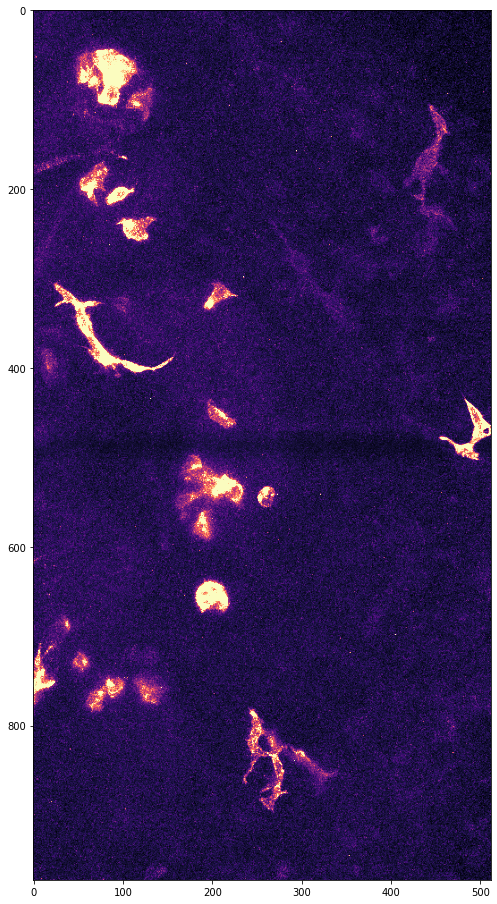

Generated patches: (224, 16, 128, 128, 1)


In [8]:
BaseDir = '/home/sancere/Kepler/CurieTrainingDatasets/MouseClaudia/AugmentedGreenCell3D/'

Model_Dir = '/home/sancere/Kepler/CurieDeepLearningModels/MouseClaudia/'
Model_Name = 'ScipyDenoising'
datagen = N2V_DataGenerator()

imgs = datagen.load_imgs_from_directory(directory = BaseDir + "Raw/", dims='ZYX')
plt.figure(figsize=(32,16))
plt.imshow(np.max(imgs[0][0,...,0],axis=0), 
           cmap='magma',
           vmin=np.percentile(imgs[0],0.1),
           vmax=np.percentile(imgs[0],99.9)
          )
plt.show()





Generated patches: (224, 16, 128, 128, 1)


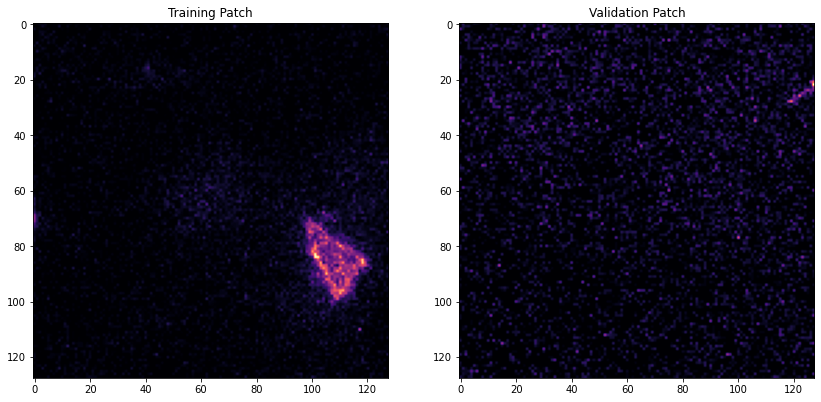

In [39]:
patch_shape = (16, 128, 128)
Epochs = 200
NetworkDepth = 3
batch_size = 1
patches = datagen.generate_patches_from_list(imgs[:1], shape=patch_shape)
X = patches[:180]
X_val = patches[180:]

# Let's look at two patches.
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.imshow(X[0,4,...,0],cmap='magma')
plt.title('Training Patch');
plt.subplot(1,2,2)
plt.imshow(X_val[0,4,...,0],cmap='magma')
plt.title('Validation Patch');

In [44]:
config = N2VConfig(X, unet_kern_size=3, unet_n_depth = NetworkDepth,
                   train_steps_per_epoch=400,train_epochs= Epochs, train_loss='mse', batch_norm=True, 
                   train_batch_size=batch_size, n2v_perc_pix=0.198,n2v_patch_shape= patch_shape, 
                   n2v_manipulator='uniform_withCP', n2v_neighborhood_radius=4)

# Let's look at the parameters stored in the config-object.
vars(config)
model = N2V(config=config, name=Model_Name, basedir=BaseDir)

/home/sancere/anaconda3/envs/tensorflowGPU/lib/python3.7/site-packages/n2v/models/n2v_standard.py:428: UserWarning: output path for model already exists, files may be overwritten: /home/sancere/Kepler/CurieTrainingDatasets/MouseClaudia/AugmentedGreenCell3D/ScipyDenoising
  warnings.warn('output path for model already exists, files may be overwritten: %s' % str(self.logdir.resolve()))


In [ ]:

history = model.train(X, X_val)

Preparing validation data: 100%|██████████| 44/44 [00:00<00:00, 824.16it/s]

519 blind-spots will be generated per training patch of size (16, 128, 128).


Epoch 1/200
400/400 [==============================] - 50s 125ms/step - loss: 0.8011 - n2v_mse: 0.8011 - n2v_abs: 0.4626 - val_loss: 0.7253 - val_n2v_mse: 0.7253 - val_n2v_abs: 0.3987

Epoch 2/200
400/400 [==============================] - 40s 101ms/step - loss: 0.4639 - n2v_mse: 0.4639 - n2v_abs: 0.4005 - val_loss: 0.6110 - val_n2v_mse: 0.6110 - val_n2v_abs: 0.3947
Epoch 3/200
400/400 [==============================] - 41s 102ms/step - loss: 0.8673 - n2v_mse: 0.8673 - n2v_abs: 0.4410 - val_loss: 0.3694 - val_n2v_mse: 0.3694 - val_n2v_abs: 0.3875
Epoch 4/200
400/400 [==============================] - 41s 103ms/step - loss: 0.6648 - n2v_mse: 0.6648 - n2v_abs: 0.4157 - val_loss: 0.3798 - val_n2v_mse: 0.3798 - val_n2v_abs: 0.4133
Epoch 5/200
400/400 [==============================] - 41s 103ms/step - loss: 0.4562 - n2v_mse: 0.4562 - n2v_abs: 0.3959 - val_loss: 0.3505 - val_n2v_mse: 0.3505 - val_n2v_abs: 0.4058
Epoch 6/200
400/400 [==============================] - 41s 103ms/step - loss: 0

400/400 [==============================] - 41s 102ms/step - loss: 0.3570 - n2v_mse: 0.3570 - n2v_abs: 0.3624 - val_loss: 0.3130 - val_n2v_mse: 0.3130 - val_n2v_abs: 0.3810
Epoch 44/200
400/400 [==============================] - 41s 103ms/step - loss: 0.3303 - n2v_mse: 0.3303 - n2v_abs: 0.3644 - val_loss: 0.3126 - val_n2v_mse: 0.3126 - val_n2v_abs: 0.3721
Epoch 45/200
400/400 [==============================] - 41s 103ms/step - loss: 0.3307 - n2v_mse: 0.3307 - n2v_abs: 0.3662 - val_loss: 0.3343 - val_n2v_mse: 0.3343 - val_n2v_abs: 0.3802

Epoch 00045: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
Epoch 46/200
400/400 [==============================] - 41s 102ms/step - loss: 0.3302 - n2v_mse: 0.3302 - n2v_abs: 0.3642 - val_loss: 0.3285 - val_n2v_mse: 0.3285 - val_n2v_abs: 0.3670
Epoch 47/200
400/400 [==============================] - 41s 103ms/step - loss: 0.3682 - n2v_mse: 0.3682 - n2v_abs: 0.3694 - val_loss: 0.3180 - val_n2v_mse: 0.3180 - val_n2v_abs: 0.3812
Epoch 4

400/400 [==============================] - 42s 105ms/step - loss: 0.3555 - n2v_mse: 0.3555 - n2v_abs: 0.3690 - val_loss: 0.3375 - val_n2v_mse: 0.3375 - val_n2v_abs: 0.3797

Epoch 00085: ReduceLROnPlateau reducing learning rate to 3.12499992105586e-06.
Epoch 86/200
400/400 [==============================] - 41s 104ms/step - loss: 0.3712 - n2v_mse: 0.3712 - n2v_abs: 0.3663 - val_loss: 0.3345 - val_n2v_mse: 0.3345 - val_n2v_abs: 0.3806
Epoch 87/200
400/400 [==============================] - 41s 104ms/step - loss: 0.3714 - n2v_mse: 0.3714 - n2v_abs: 0.3712 - val_loss: 0.3397 - val_n2v_mse: 0.3397 - val_n2v_abs: 0.3795
Epoch 88/200
400/400 [==============================] - 42s 105ms/step - loss: 0.3625 - n2v_mse: 0.3625 - n2v_abs: 0.3653 - val_loss: 0.3357 - val_n2v_mse: 0.3357 - val_n2v_abs: 0.3813
Epoch 89/200
400/400 [==============================] - 42s 105ms/step - loss: 0.3352 - n2v_mse: 0.3352 - n2v_abs: 0.3565 - val_loss: 0.3423 - val_n2v_mse: 0.3423 - val_n2v_abs: 0.3810
Epoch 90

400/400 [==============================] - 41s 103ms/step - loss: 0.3221 - n2v_mse: 0.3221 - n2v_abs: 0.3602 - val_loss: 0.3337 - val_n2v_mse: 0.3337 - val_n2v_abs: 0.3791
Epoch 128/200
400/400 [==============================] - 41s 102ms/step - loss: 0.3156 - n2v_mse: 0.3156 - n2v_abs: 0.3621 - val_loss: 0.3402 - val_n2v_mse: 0.3402 - val_n2v_abs: 0.3799
Epoch 129/200
400/400 [==============================] - 41s 103ms/step - loss: 0.3215 - n2v_mse: 0.3215 - n2v_abs: 0.3599 - val_loss: 0.3356 - val_n2v_mse: 0.3356 - val_n2v_abs: 0.3804
Epoch 130/200
400/400 [==============================] - 41s 103ms/step - loss: 0.3720 - n2v_mse: 0.3720 - n2v_abs: 0.3615 - val_loss: 0.3380 - val_n2v_mse: 0.3380 - val_n2v_abs: 0.3794
Epoch 131/200
400/400 [==============================] - 41s 103ms/step - loss: 0.3743 - n2v_mse: 0.3743 - n2v_abs: 0.3683 - val_loss: 0.3321 - val_n2v_mse: 0.3321 - val_n2v_abs: 0.3774
Epoch 132/200
400/400 [==============================] - 41s 103ms/step - loss: 0.33

400/400 [==============================] - 54s 135ms/step - loss: 0.3169 - n2v_mse: 0.3169 - n2v_abs: 0.3626 - val_loss: 0.3377 - val_n2v_mse: 0.3377 - val_n2v_abs: 0.3796
Epoch 170/200
400/400 [==============================] - 53s 131ms/step - loss: 0.3393 - n2v_mse: 0.3393 - n2v_abs: 0.3635 - val_loss: 0.3373 - val_n2v_mse: 0.3373 - val_n2v_abs: 0.3788
Epoch 171/200
400/400 [==============================] - 56s 140ms/step - loss: 0.3203 - n2v_mse: 0.3203 - n2v_abs: 0.3609 - val_loss: 0.3382 - val_n2v_mse: 0.3382 - val_n2v_abs: 0.3799
Epoch 172/200
400/400 [==============================] - 55s 137ms/step - loss: 0.3112 - n2v_mse: 0.3112 - n2v_abs: 0.3603 - val_loss: 0.3379 - val_n2v_mse: 0.3379 - val_n2v_abs: 0.3786
Epoch 173/200
400/400 [==============================] - 55s 139ms/step - loss: 0.3653 - n2v_mse: 0.3653 - n2v_abs: 0.3688 - val_loss: 0.3324 - val_n2v_mse: 0.3324 - val_n2v_abs: 0.3774
Epoch 174/200
400/400 [==============================] - 56s 140ms/step - loss: 0.30

In [ ]:
print(sorted(list(history.history.keys())))
plt.figure(figsize=(16,5))
plot_history(history,['loss','val_loss']);

In [ ]:
model.save(BaseDir + Model_Name )

In [ ]:
plt.figure(figsize=(12,7))
_P = model.keras_model.predict(X_val[:5])

plot_some(X_val[:5],Y_val[:5],_P,pmax=99.5)
plt.suptitle('5 example validation patches\n'      
             'top row: input (source),  '          
             'middle row: target (ground truth),  '
             'bottom row: predicted from source');